In [43]:
# new topic


<b>Goemetrical view of svd</b>

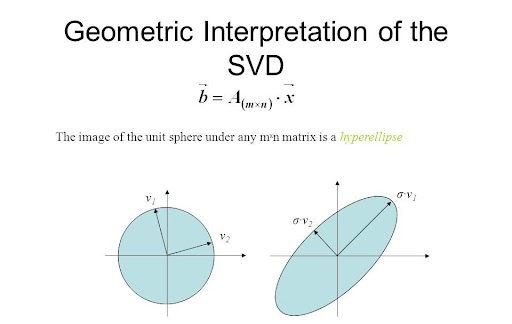






Fig credit: Math for CSLecture




The above image shows how the points get linearly transformed by A, i.e. A v= σ u (equation 1)
<br> 
svd says 3 important things about this transormation

1.  The u<sub>i</sub> vectors in SVD decompostion of A form the axes of the new  transformed subspace
2. the length of each axis is equal to coressponding σ<sub>i</sub> value
3. the preimage of u<sub>i</sub> is the corresponding v<sub>i</sub> of the SVD of A (from equation 1)



<b>References</b>:

https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/lecture-29-singular-value-decomposition/

"Spectral Learning on Matrices and Tensors" textbook



**Implementation of SVD**

In [44]:
import numpy as np
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)                       # v here=v(Trans) in svd transpose actually 
U,D,V

(array([[-0.69366543,  0.59343205, -0.40824829],
        [-0.4427092 , -0.79833696, -0.40824829],
        [-0.56818732, -0.10245245,  0.81649658]]),
 array([10.25142677,  2.62835484]),
 array([[-0.88033817, -0.47434662],
        [ 0.47434662, -0.88033817]]))

**Applications of Singular Value Decomposition (SVD)**</b>

Image Compression</b>



In [45]:
import numpy as np
import matplotlib.pyplot as plt
#This line is required to display visualizations in the browser
%matplotlib inline

In [46]:
from skimage import data
from skimage.color import rgb2gray
from ipywidgets import interact,interactive,interact_manual

In [47]:
from skimage import img_as_ubyte,img_as_float
gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "astro":rgb2gray(img_as_float(data.astronaut())),
        "camera":data.camera(),
        "coin": data.coins(),
        "clock":data.clock(),
        "blobs":data.binary_blobs(),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

In [48]:
from numpy.linalg import svd


In [49]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s

In [50]:
def compress_show_gray_images(img_name,k):
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()
    
    
    

In [51]:
import numpy as np 
def compute_k_max(img_name):
  """
    utility function for calculating max value of the slider range
  """
  img = gray_images[img_name]
  m,n = img.shape
  return m*n/(m+n+1)

#set up the widgets
import ipywidgets as widgets

list_widget = widgets.Dropdown(options=list(gray_images.keys()))
int_slider_widget = widgets.IntSlider(min=1,max=compute_k_max('cat'))
def update_k_max(*args):
  img_name=list_widget.value
  int_slider_widget.max = compute_k_max(img_name)
list_widget.observe(update_k_max,'value')




In [52]:
interact(compress_show_gray_images,img_name=list_widget,k=int_slider_widget);

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'camera', 'coin', 'clock', 'bl…

Reference :https://colab.research.google.com/drive/1HLJcLzWG46NlPMCgD_KdVLCl-k68mVp2#scrollTo=d35EdHEQpv-b



Image Recovery</b>



The process of filling in the missing items in a partly seen matrix is known as matrix completion. A well-known example of this is the Netflix dilemma.If customer I has viewed movie j and is otherwise unavailable, we'd want to anticipate the remaining entries in order to offer appropriate suggestions to consumers on what to watch next, given a ratings matrix in which each entry (i,j) indicates the rating of movie j by customer i.

The fact that most users have a pattern in the movies they view and the ratings they give to these movies is a key factor in resolving this issue. As a result, the ratings matrix contains very little unique data. This implies that a low-rank matrix would be able to approximate the matrix well enough.

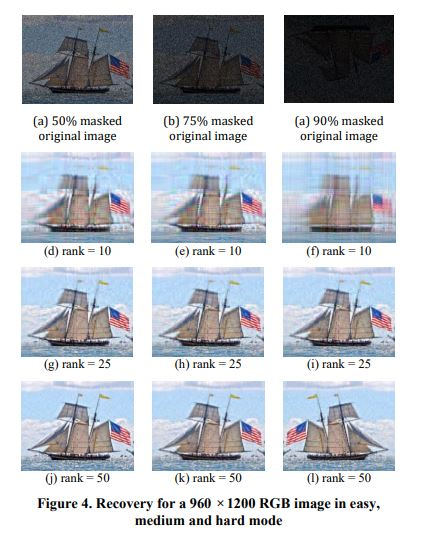

Reference :https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/


Eigen faces</b>



The encoding is accomplished by expressing each face in the new face space as a linear combination of the specified eigenfaces.
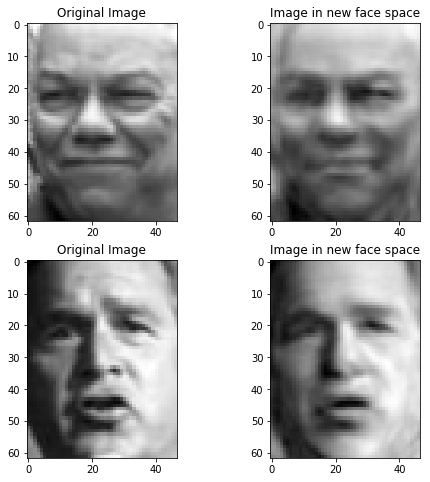


Spectral Clustering</b>



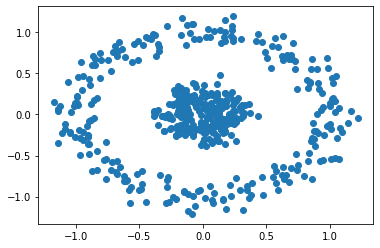

C:\Users\ISTF_IITGN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


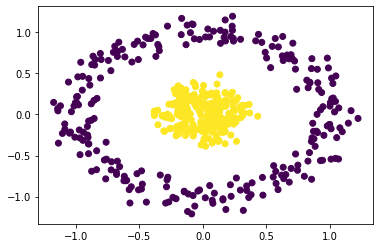

In [53]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# generate your data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# plot your data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# train and predict
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X)
        
# plot clustered data
plt.scatter(X[:, 0], X[:, 1], c = s_cluster)
plt.show()
# source :Gitgub - rawspectral_clustering.py 